In [ ]:
#Edward Vrijghem
#homework chaptr 5,6,7

In [49]:
# exercise 5.3a and b 
# a
#K fold cross is used by splitting your training data and splitting it into K groups, which don't overlap, all of them are 
#again split into training and validation sets. The average of the test errors of the K validation sets is seen as test error.
# b
# Validation approach is basically the same as k = 1, so it's similar but simpler and results in more variance of the test error
#  Leave on out cross-validation, is also a form of K fold but K=N. As K is very high the LOOCV is a bit slower. 
#It's supposed to have a higher variance but a lower bias. 

In [50]:
# exercise 5.8 
set.seed(1)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)
#n = 100 and p = 2
#y = x-2*x²+e

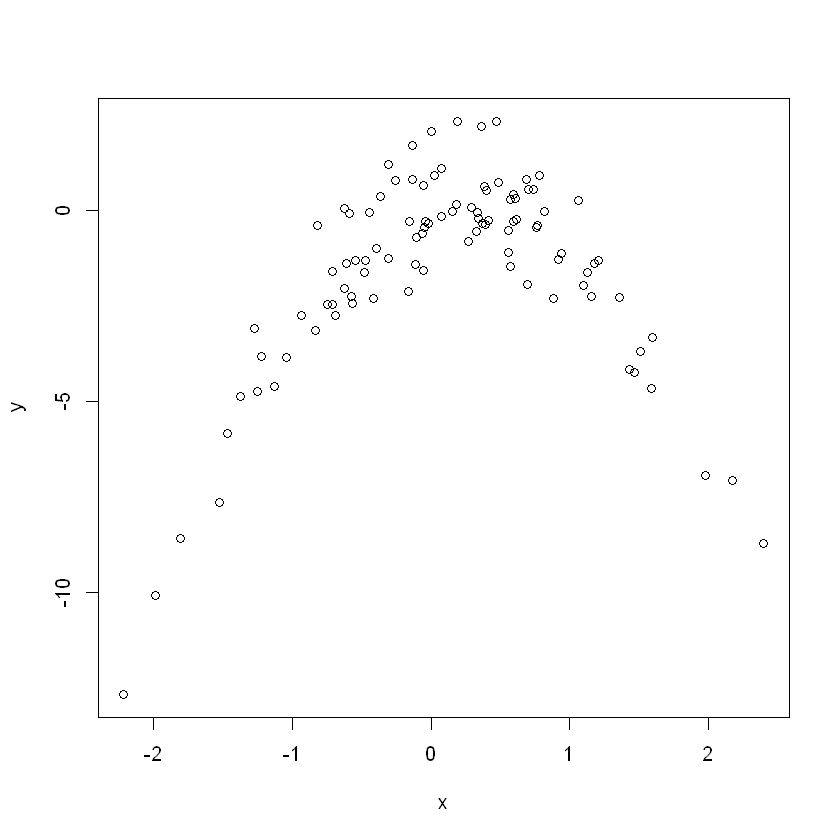

In [51]:
plot(x, y)
#you can see a clear quadratic pattern (upward facing arch), suggesting there is a quadratic relation. 

In [52]:
#c: LOOCV errors comparison using OLS
set.seed(1)
data = data.frame(x,y)
install.packages("boot")
library(boot)

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'boot' is in use and will not be installed"

In [53]:
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 7.288162 7.284744

In [54]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 0.9374236 0.9371789

In [55]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [56]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(data, glm.fit)$delta

[1] 0.9539049 0.9534453

In [57]:
# d since (as described in 5b) uses n fold validation (so k = n), I expected the outcome to be almost the same for different seeds. 
set.seed(2)

In [58]:
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 7.288162 7.284744

In [59]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 0.9374236 0.9371789

In [60]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [61]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(data, glm.fit)$delta

[1] 0.9539049 0.9534453

In [ ]:
#e the quadratic one has the lowest average error, you could've expected this looking at the scatterplot earlier, the form/relation is approximately quadratic 

In [62]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


In [63]:
#both linear and quadratic are significant, we can agree with our previous result. 

In [ ]:
#exercise 6.1
#a: best subset should have the lowest training error since it considers all combinations of variables
#b: I would also say best subset again because it considers more models than the other two methods, but it's less defined since
# both stepwise selection methods could fit the test data as good as the best subset method...
#c: True, True, False, False, False. 

In [64]:
#exercise 6.9 
library(ISLR)
set.seed(1)

In [75]:
#a 
data(College)
set.seed(1)
trainid <- sample(1:nrow(College), nrow(College)/2)
train <- College[trainid,]
test <- College[-trainid,]
str(College)


'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [89]:
#b
#fit the model
lm.fit = lm(Apps~., data=train)
lm.pred = predict(lm.fit, test)
# use the RSS Formula (this is the test RSS)
(err.lm <- mean((College.test[, "Apps"] - lm.pred)^2))

[1] 1135758

In [79]:
# c 
install.packages("glmnet")
library(glmnet)

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'glmnet' is in use and will not be installed"

In [96]:
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.ridge <- cv.glmnet(xmat.train, train$Apps, alpha=0)
#best lambda
(lambda <- fit.ridge$lambda.min)  
pred.ridge <- predict(fit.ridge, s=lambda, newx=xmat.test)
(err.ridge <- mean((test$Apps - pred.ridge)^2))

[1] 405.8404

[1] 976261.5

In [ ]:
#as you can tell, there is a very small difference between OLS and RSS, OLS having a test RSS which is a bit smaller. 

In [85]:
# d 
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.lasso <- cv.glmnet(xmat.train, train$Apps, alpha=1)
(lambda <- fit.lasso$lambda.min)  # optimal lambda
pred.lasso <- predict(fit.lasso, s=lambda, newx=xmat.test)
(err.lasso <- mean((test$Apps - pred.lasso)^2))  # test error
coef.lasso <- predict(fit.lasso, type="coefficients", s=lambda)[1:ncol(College),]
coef.lasso[coef.lasso != 0]
length(coef.lasso[coef.lasso != 0])

[1] 1.97344

[1] 1115901

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-7.688896e+02 -3.127034e+02  1.762718e+00 -1.318195e+00  6.482356e+01 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
-2.081406e+01  7.119149e-02  1.246161e-02 -1.049091e-01  2.088305e-01 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.926466e-01  3.955068e-03 -1.455463e+01  5.395858e+00  2.171398e+01 
  perc.alumni        Expend     Grad.Rate 
 5.088260e-01  4.824455e-02  7.036148e+00

[1] 18

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4288     3980     2370     2365     2080     1973     1927
adjCV         4288     3984     2366     2365     2036     1957     1920
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1929     1937     1889      1823      1824      1827      1819
adjCV     1922     1931     1880      1811      1815      1818      1811
       14 comps  15 comps  16 comps  17 comps
CV         1819      1733      1269      1212
adjCV      1812      1710      1259      1203

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       32.20    57.78    65.31    70.99    76.37    81.27     84.8    87.85
Apps    13.44    70.93    71.07    79.87    81.15    82.25     82.3    82.3

[1] 1137877

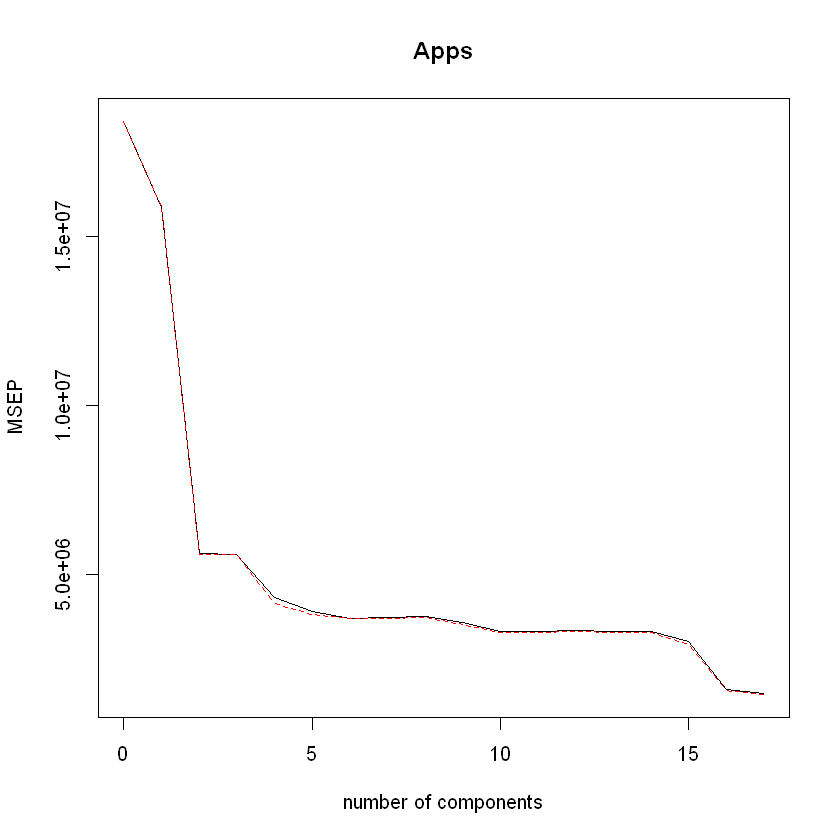

In [86]:
# e 
fit.pcr <- pcr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pcr, val.type="MSEP")
summary(fit.pcr)
pred.pcr <- predict(fit.pcr, test, ncomp=16)  # min Cv at M=16
(err.pcr <- mean((test$Apps - pred.pcr)^2)) 

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4288     2217     2019     1761     1630     1533     1347
adjCV         4288     2211     2012     1749     1605     1510     1331
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1309     1303     1286      1283      1283      1277      1271
adjCV     1296     1289     1273      1270      1270      1264      1258
       14 comps  15 comps  16 comps  17 comps
CV         1270      1270      1270      1270
adjCV      1258      1257      1257      1257

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       27.21    50.73    63.06    65.52    70.20    74.20    78.62    80.81
Apps    75.39    81.24    86.97    91.14    92.62    93.43    93.56    

[1] 1131661

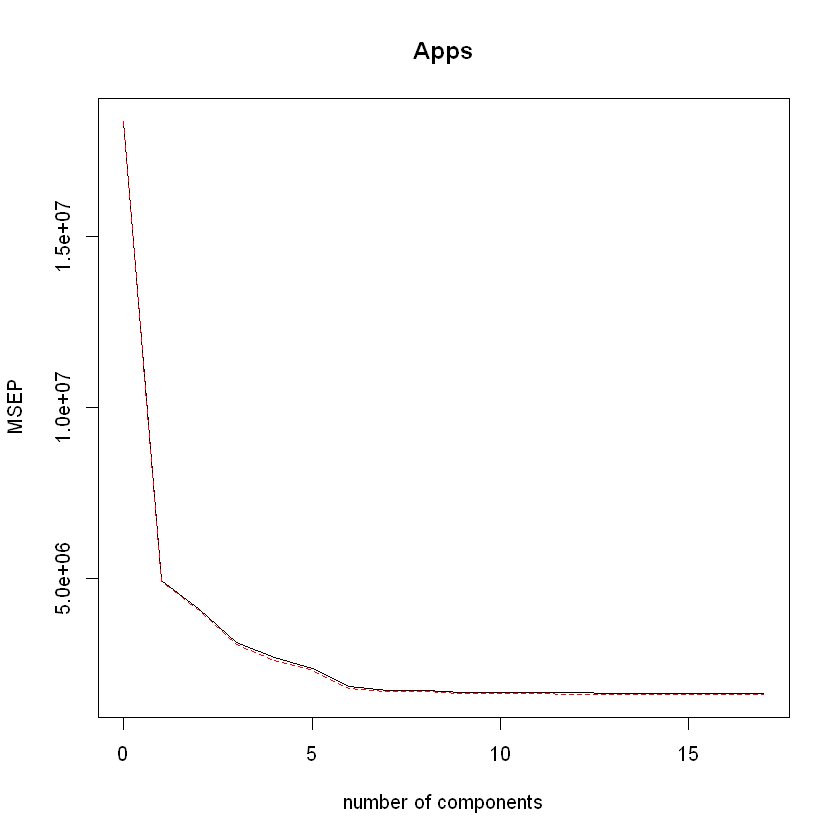

In [87]:
#f 
require(pls)
set.seed(1)
fit.pls <- plsr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pls, val.type="MSEP")
summary(fit.pls)
pred.pls <- predict(fit.pls, test, ncomp=10)  # min Cv at M=10
(err.pls <- mean((test$Apps - pred.pls)^2))

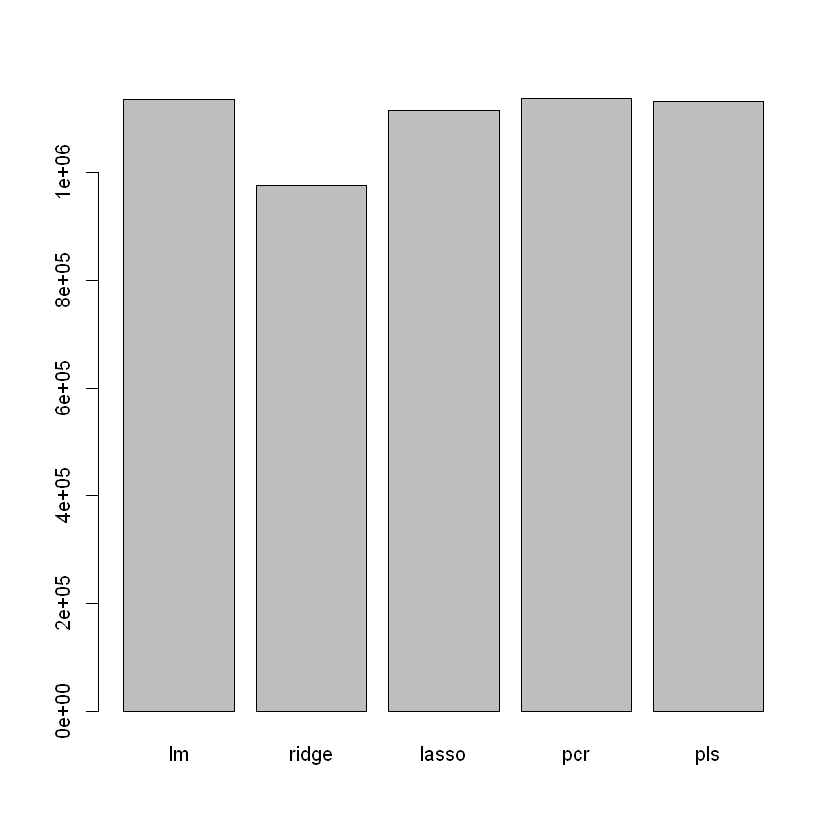

In [90]:
# g 
err.all <- c(err.lm, err.ridge, err.lasso, err.pcr, err.pls)
names(err.all) <- c("lm", "ridge", "lasso", "pcr", "pls")
barplot(err.all )

In [ ]:
#as you can see the differences between the test errors are quite similar, ridge seems to perform the best. 

In [97]:
#exercise 7.9
#loading boston 
install.packages("MASS")
library(MASS)
attach(Boston)

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\evrijghem\AppData\Local\Temp\RtmpKoDICo\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.2"

In [98]:
lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


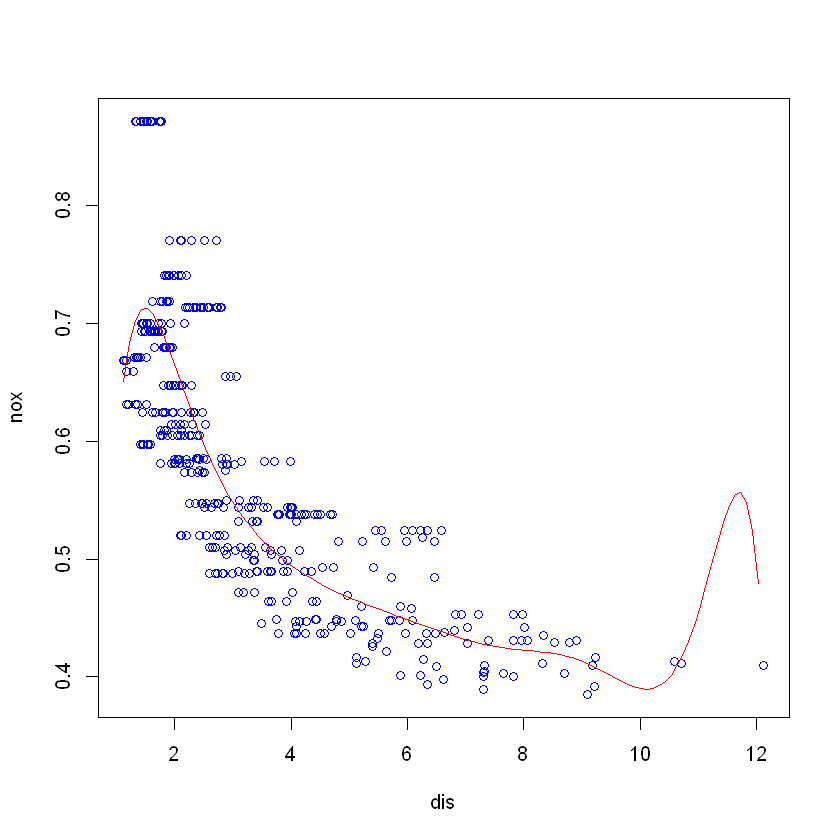

In [104]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "blue")
lines(dis.grid, lm.pred, col = "red")

In [ ]:
# we see that all polynomials are significant and see that the curve fits the data quite good, but not perfect (10 to 12) ...

In [101]:
#b 
all.rss = rep(NA, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(lm.fit$residuals^2)
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

In [ ]:
#we see that rss decreases with each iteration

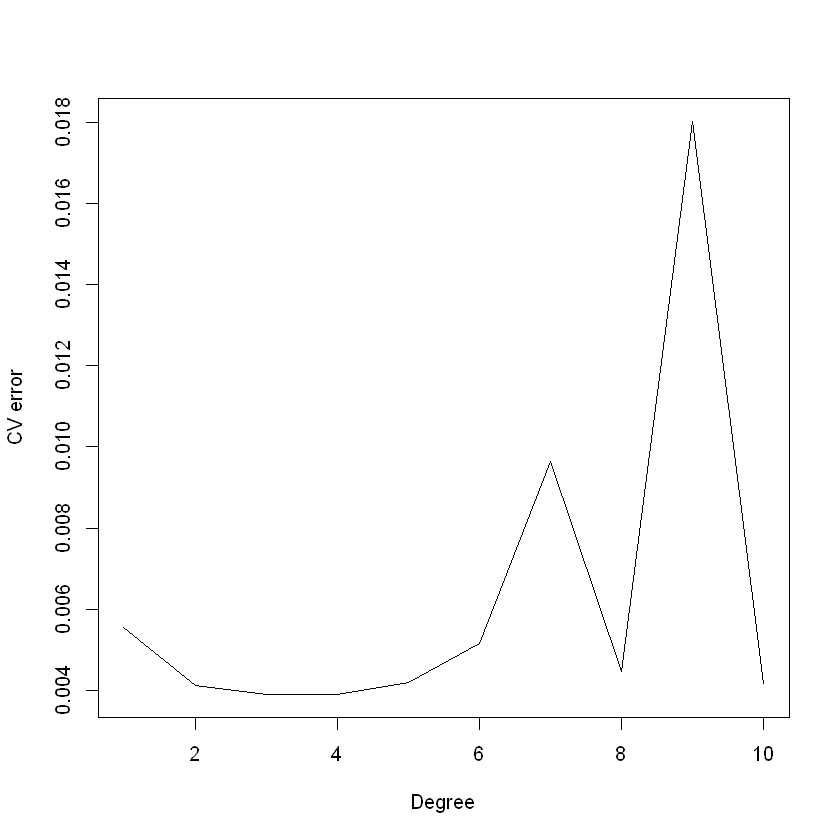

In [103]:
#loop selecting the best polynomial degree
all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l")

In [ ]:
#we see 2 to 6 being quite stable but a big variance starting from 6. 4 is clearly the best degree. 

In [106]:
# d 
install.packages("splines")
library(splines)

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'splines' is not available (for R version 3.6.1)"Warning message:
"package 'splines' is a base package, and should not be updated"

In [107]:
sp.fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 4, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 4, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

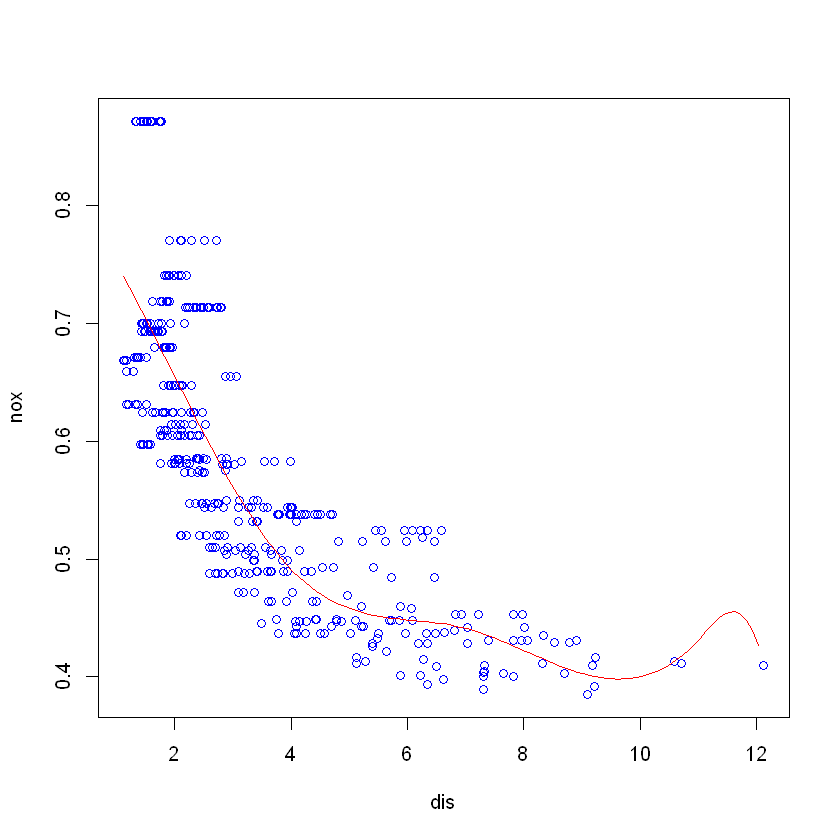

In [108]:
sp.pred = predict(sp.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "blue")
lines(dis.grid, sp.pred, col = "red")

In [ ]:
#very similar result as the graph in #a, all terms are significant, a good fitting plot exept for dis 10-12 .. 

In [109]:
#e
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = lm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = sum(lm.fit$residuals^2)
}
all.cv[-c(1, 2)]

[1] 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535
 [9] 1.796992 1.788999 1.782350 1.781838 1.782798 1.783546

In [ ]:
#we see a decrease untill 14, for 15 and 16 it goes back up a bit

In [110]:
#f
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = glm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = cv.glm(Boston, lm.fit, K = 10)$delta[2]
}

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.3175), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.3175), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, deg

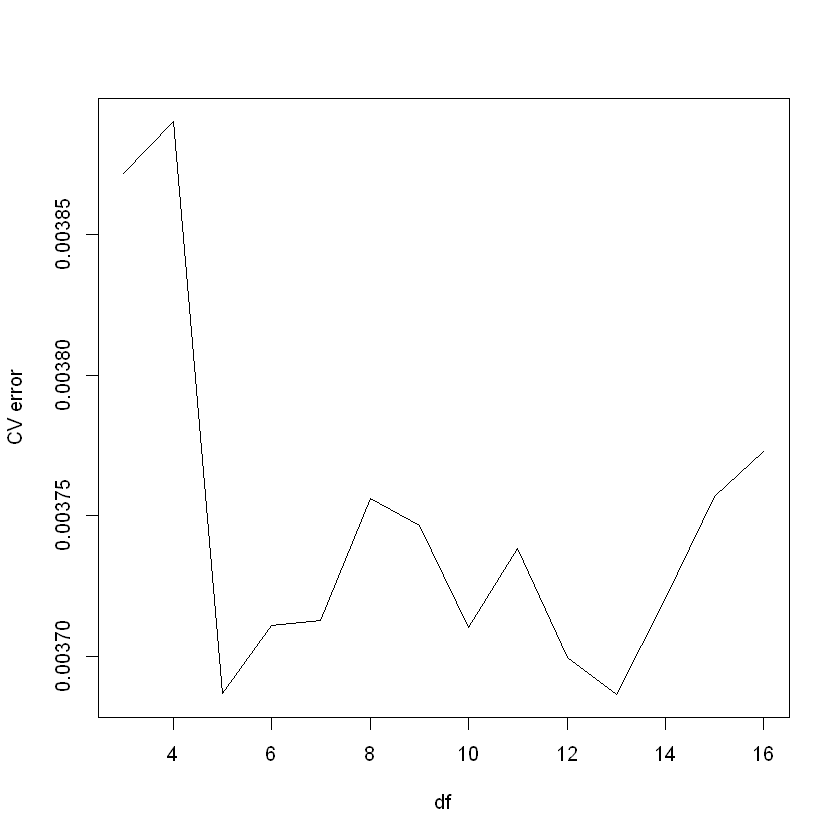

In [112]:
plot(3:16, all.cv[-c(1, 2)],type = "l", xlab = "df", ylab = "CV error")

In [113]:
#this error is less stable in the beginning, we pick 5 as the optimal degrees of freedom. 

In [ ]:
# exercise 7.10 
#a
set.seed(1)
install.packages("leaps")
library(leaps)
attach(College)

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\evrijghem\AppData\Local\Temp\RtmpKoDICo\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.6.2"

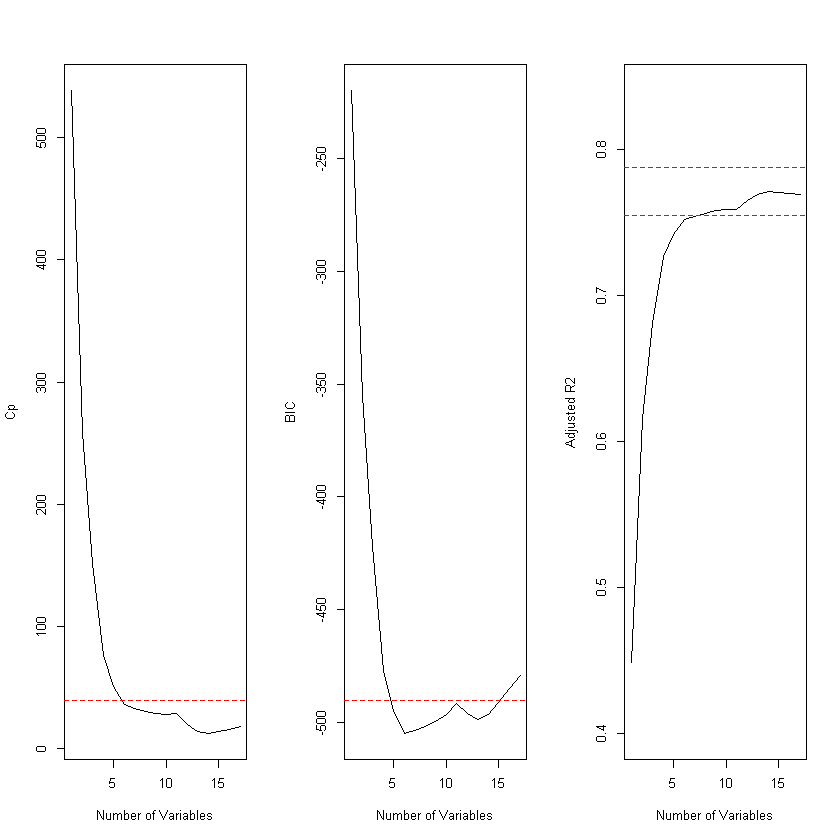

In [115]:
train = sample(length(Outstate), length(Outstate)/2)
test = -train
College.train = College[train, ]
College.test = College[test, ]
reg.fit = regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")
reg.summary = summary(reg.fit)
par(mfrow = c(1, 3))
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
min.cp = min(reg.summary$cp)
std.cp = sd(reg.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
min.bic = min(reg.summary$bic)
std.bic = sd(reg.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R2", 
    type = "l", ylim = c(0.4, 0.84))
max.adjr2 = max(reg.summary$adjr2)
std.adjr2 = sd(reg.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)


In [ ]:
#We see that size 6 is the miunimum for the subset. Scores are 0.2 std dev of the optimum. We should thus look for the best 6 variables to predict Y. 

In [116]:
reg.fit = regsubsets(Outstate ~ ., data = College, method = "forward")
coefi = coef(reg.fit, id = 6)
names(coefi)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "PhD"         "perc.alumni"
[6] "Expend"      "Grad.Rate"

In [118]:
#b 
install.packages("gam")
library(gam)

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\evrijghem\AppData\Local\Temp\RtmpKoDICo\downloaded_packages


Warning message:
"package 'gam' was built under R version 3.6.2"Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.6.2"Loaded gam 1.16.1



Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

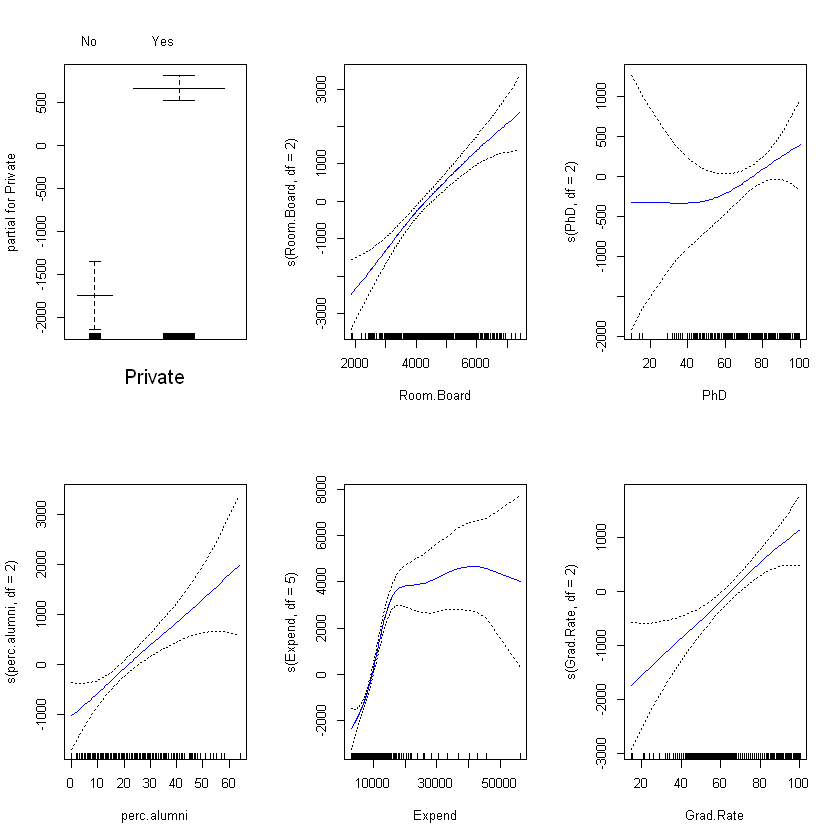

In [119]:
gam.fit = gam(Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, df = 2) + 
    s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, df = 2), data = College.train)
par(mfrow = c(2, 3))
plot(gam.fit, se = T, col = "blue")

In [120]:
#c 
gam.pred = predict(gam.fit, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err

[1] 3349290

In [121]:
gam.tss = mean((College.test$Outstate - mean(College.test$Outstate))^2)
test.rss = 1 - gam.err/gam.tss
test.rss

[1] 0.7660016

In [122]:
#d
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, 
    df = 2) + s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, 
    df = 2), data = College.train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7402.89 -1114.45   -12.67  1282.69  7470.60 

(Dispersion Parameter for gaussian family taken to be 3711182)

    Null Deviance: 6989966760 on 387 degrees of freedom
Residual Deviance: 1384271126 on 373 degrees of freedom
AIC: 6987.021 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private                  1 1778718277 1778718277 479.286 < 2.2e-16 ***
s(Room.Board, df = 2)    1 1577115244 1577115244 424.963 < 2.2e-16 ***
s(PhD, df = 2)           1  322431195  322431195  86.881 < 2.2e-16 ***
s(perc.alumni, df = 2)   1  336869281  336869281  90.771 < 2.2e-16 ***
s(Expend, df = 5)        1  530538753  530538753 142.957 < 2.2e-16 ***
s(Grad.Rate, df = 

In [ ]:
#from the anova results we can see there is a ,non linear relation between response and expend. If we allow p < 0.05 there is also a one between graduation rate and PhD. 